In [1]:
import os, sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# modelica interface
import buildingspy.simulate.Simulator as si
import buildingspy.io.outputfile as buipy_io

# thermal
import  CoolProp.CoolProp as CP
from CoolProp.HumidAirProp import HAPropsSI
import psychrolib as psylib
psylib.SetUnitSystem(psylib.SI)

In [2]:
sys.path.insert(0, os.path.join('.','..','calibration'))
from thermodynamics import *
from postprocessing import *
from plotting import *
from calibration_MgCl2_class import *

# import code of mathieu
import media_model_mgcl2 as model_mg
import media_model_water as model_w

In [3]:
%load_ext autoreload
# only reload the function imported by "aimport"
%autoreload 1
%aimport thermodynamics, postprocessing, plotting, calibration_MgCl2_class

# Data preprocessing

In [13]:
path_expdata = os.path.join(os.path.expanduser('~'), 'GIT', 'EnBA_M', 'BrineGrid_HDisNet', 'Extras', 'Python', 'exp_data')

## Chen2016

In [14]:
df_chen_data = pd.read_excel(os.path.join(path_expdata, "actual_data/selected/Chen2016.xlsx"), index_col=0)

In [17]:
df_chen_data['x_d_in_equ'] = np.vectorize(calc_x_des_equ)(df_chen_data.T_d_in, df_chen_data.xi_d_in)
df_chen_data["RH_a_in"] = np.vectorize(get_RH)(df_chen_data.T_a_in, df_chen_data.x_a_in) *100
df_chen_data["RH_a_o_exp"] = np.vectorize(get_RH)(df_chen_data.T_a_o_exp, df_chen_data.x_a_o_exp) *100
df_chen_data["RH_d_in_equ"] = np.vectorize(get_RH)(df_chen_data.T_d_in, df_chen_data.x_d_in_equ) *100

[0.43157226 0.74883007 0.04473797 0.6       ]
[0.64086828 0.65705644 0.40121366 0.6       ]
[0.88397037 0.7175875  0.8189397  0.6       ]
[0.95800274 0.85133079 0.13195419 0.6       ]
[0.53750593 0.70396127 0.36874287 0.6       ]
[0.71546568 0.99020465 0.130497   0.6       ]
[0.14668495 0.12697224 0.74768715 0.6       ]
[0.86035169 0.03760911 0.32416047 0.6       ]
[0.09805932 0.25778919 0.21681359 0.6       ]
[0.91257577 0.13694847 0.25697933 0.6       ]
[0.68203238 0.3563165  0.37807309 0.6       ]
[0.65262759 0.08678465 0.60691564 0.6       ]
[0.52272348 0.00195469 0.82154725 0.6       ]
[0.98197221 0.04875686 0.75737289 0.6       ]
[0.47182046 0.63797163 0.71613535 0.6       ]


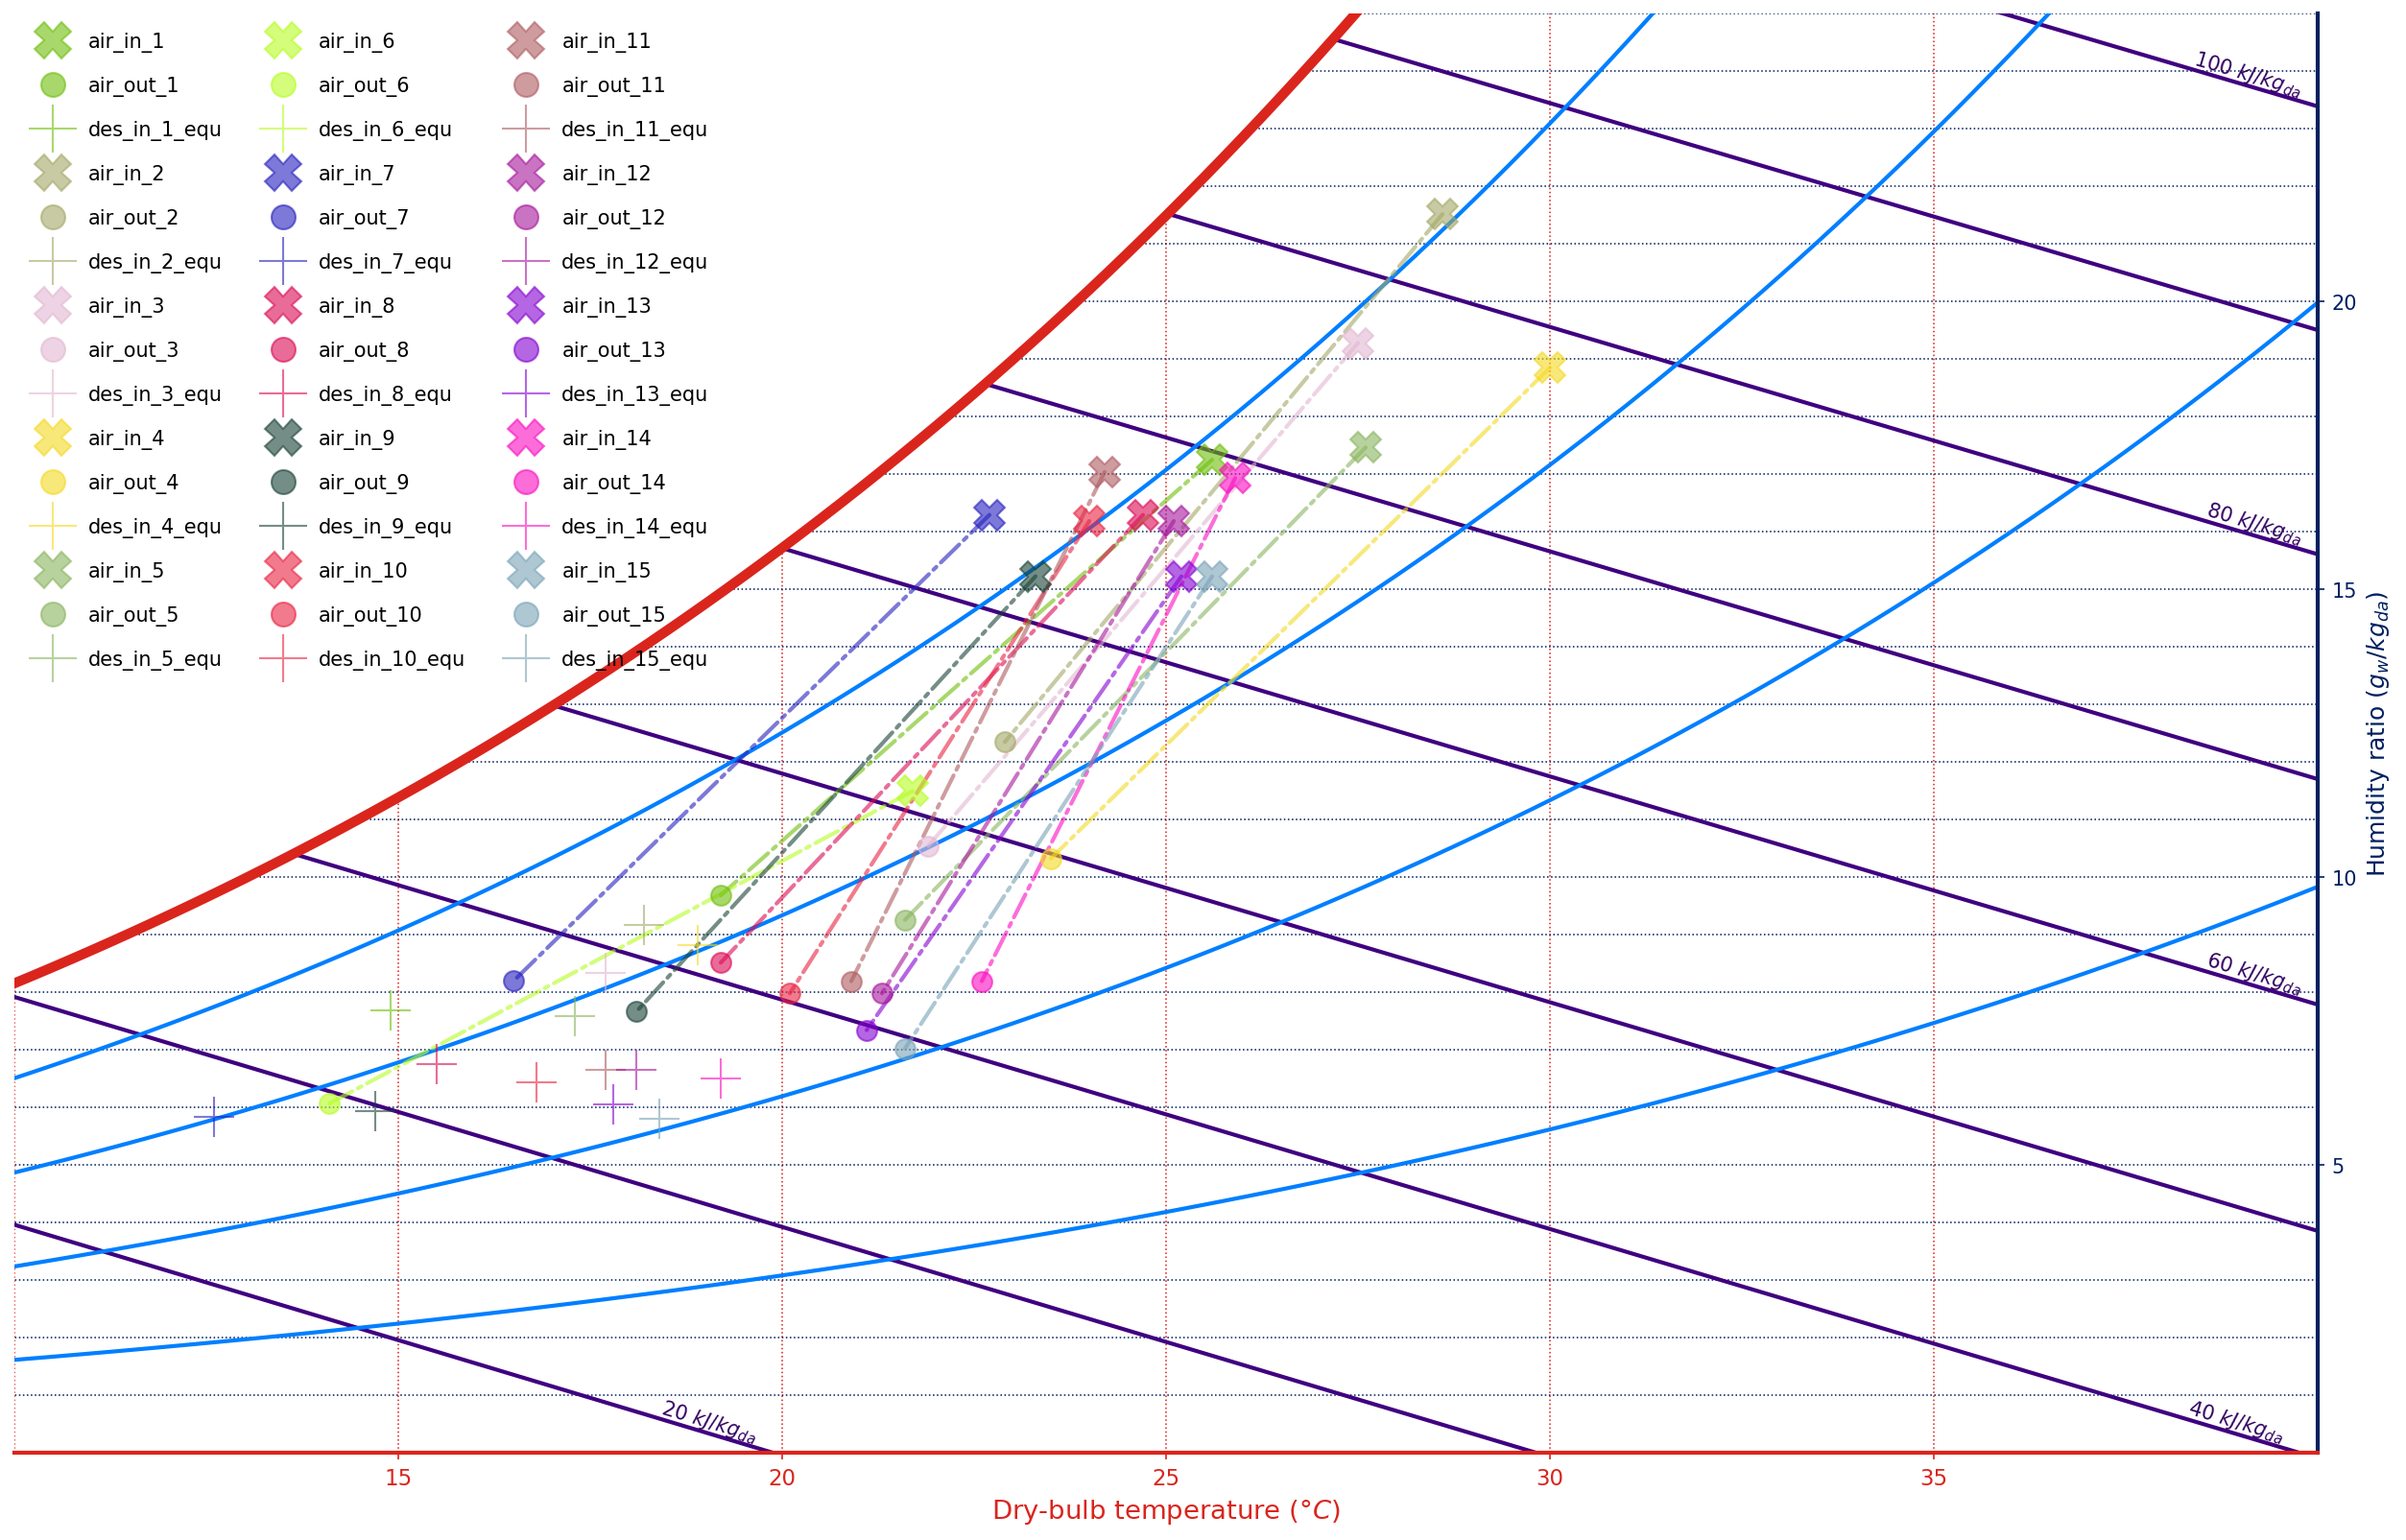

<Figure size 432x288 with 0 Axes>

In [18]:
plot_with_des_point_df(df_data=df_chen_data, chart_template='minimal', use_line_highlight = False, ncol = 3, ) # save_fig_name="Chen_minimal.png"

## Dempav

In [19]:
df_exp_dempav = pd.read_excel("../exp_data/actual_data/selected/dempav_T_des_corrected.xlsx", index_col=0)
df_exp_dempav.head()

,T_a_in,RH_a_in,m_a_in,T_d_in,xi_d_in,m_d_in,T_a_o_exp,RH_a_o_exp,T_d_o_exp,x_a_in,x_a_o_exp
0,298.02,0.480462,0.018848,287.44,0.318302,0.102670,290.21,0.476947,288.662602,0.009457,0.005773
1,300.51,0.553303,0.036283,292.20,0.318186,0.102670,294.81,0.538242,294.359825,0.012683,0.008716
2,298.02,0.458659,0.032644,284.16,0.318572,0.102670,287.98,0.506137,286.568520,0.009022,0.005308
3,301.31,0.504712,0.036150,290.94,0.318174,0.102669,293.69,0.519635,293.461463,0.012112,0.007844
4,299.87,0.423994,0.045742,290.34,0.318171,0.102668,292.89,0.525218,292.328509,0.009311,0.007542


In [20]:
df_exp_dempav['x_d_in_equ'] = np.vectorize(calc_x_des_equ)(df_exp_dempav.T_d_in, df_exp_dempav.xi_d_in)
df_exp_dempav["RH_a_in"] = df_exp_dempav["RH_a_in"] * 100
df_exp_dempav["RH_a_o_exp"] = df_exp_dempav["RH_a_o_exp"] * 100
df_exp_dempav["RH_d_in_equ"] = np.vectorize(get_RH)(df_exp_dempav.T_d_in, df_exp_dempav.x_d_in_equ) *100

[0.80450671 0.39766476 0.78011231 0.8       ]
[0.39170766 0.00840977 0.11138842 0.8       ]
[0.47118168 0.16658982 0.65168563 0.8       ]
[0.64032399 0.61345011 0.73827134 0.8       ]
[0.7847359  0.98659989 0.48526098 0.8       ]
[0.26801375 0.44575593 0.11795913 0.8       ]
[0.92790084 0.58419559 0.66301982 0.8       ]
[0.32792732 0.44309608 0.85661801 0.8       ]
[0.60590283 0.92006961 0.68632061 0.8       ]
[0.96467037 0.05880964 0.67613685 0.8       ]
[0.38715954 0.24662183 0.28856288 0.8       ]
[0.21508868 0.86191362 0.40133206 0.8       ]
[0.90782492 0.6105707  0.40583678 0.8       ]
[0.34722133 0.17162163 0.99037831 0.8       ]
[0.71976339 0.9185446  0.15575658 0.8       ]
[0.85412557 0.50144451 0.77713669 0.8       ]
[0.91695422 0.83015421 0.85104048 0.8       ]
[0.97300565 0.27073112 0.92794964 0.8       ]
[0.19293095 0.96391085 0.81064612 0.8       ]
[0.78620538 0.99185231 0.80822829 0.8       ]
[0.27287451 0.38006423 0.69070459 0.8       ]
[0.70922105 0.23372417 0.90990132 

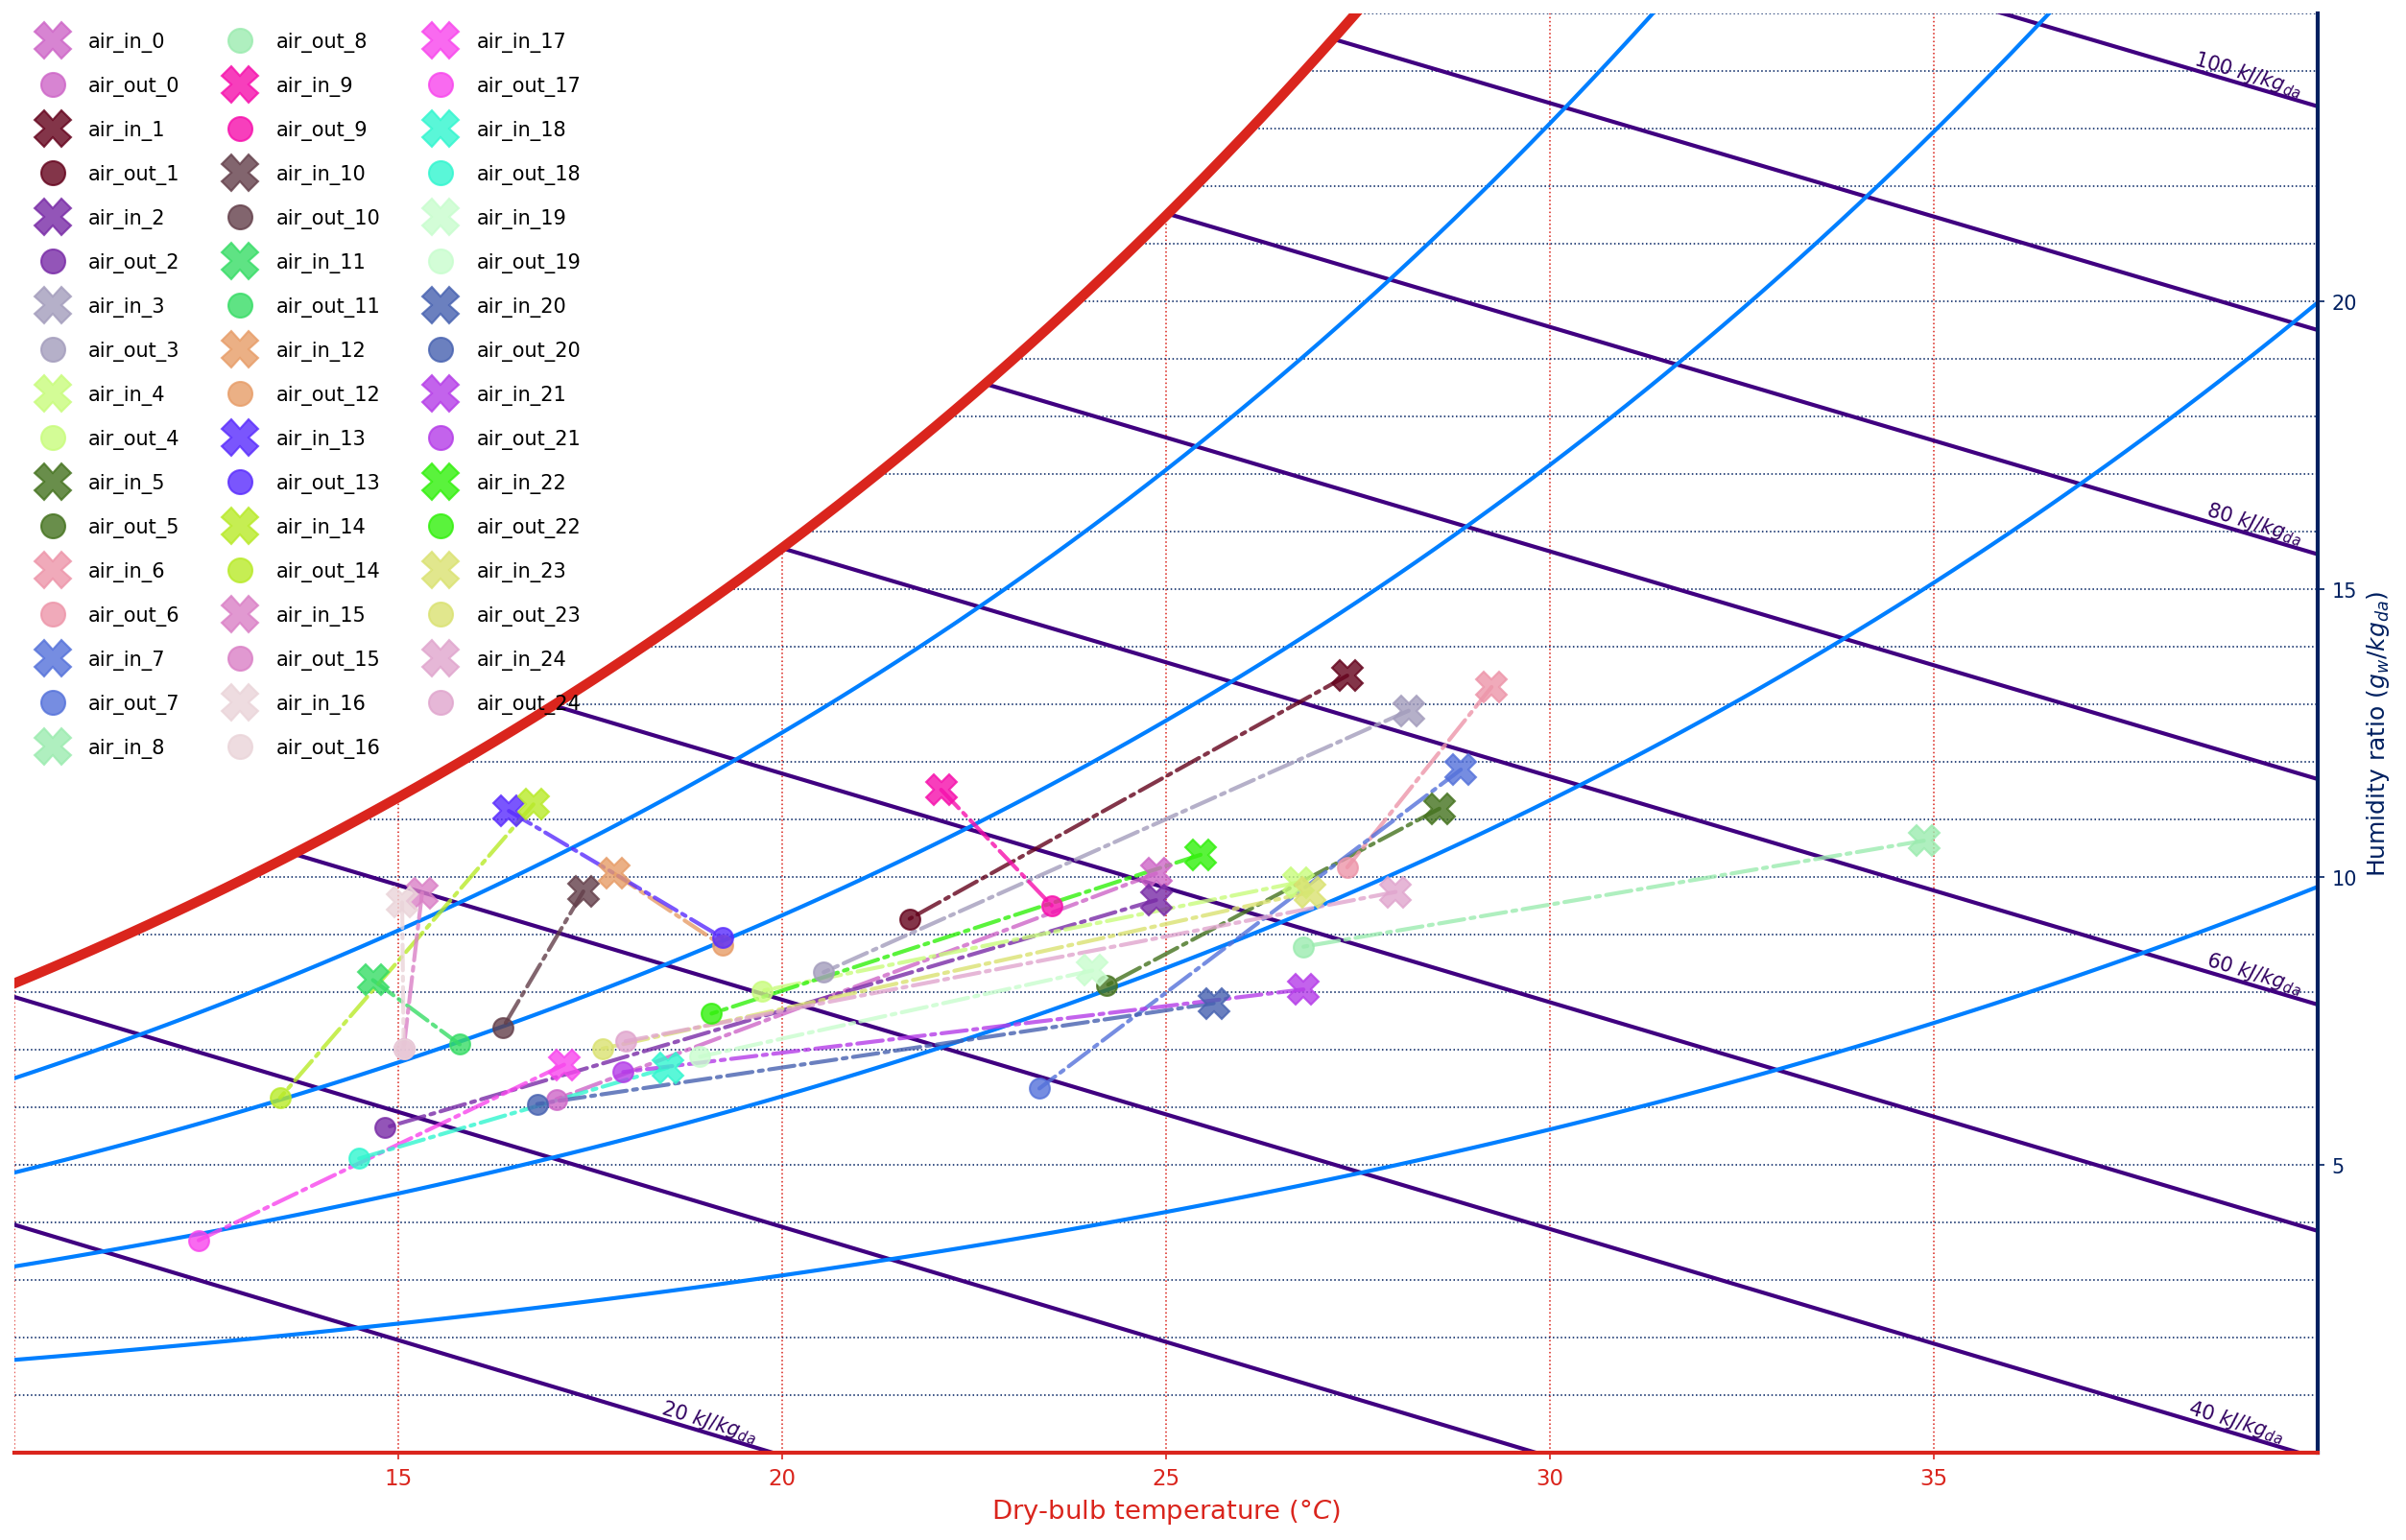

<Figure size 432x288 with 0 Axes>

In [10]:
plot_air_state_df(df_data=df_exp_dempav, chart_template="minimal", alpha=0.8, save_fig_name='dempav_all.png' )

In [23]:
df_exp_dempav.query('T_a_in - T_a_o_exp > 2').shape

(17, 13)

[0.75952404 0.79735584 0.65719693 0.8       ]
[0.3436752  0.59489805 0.65571919 0.8       ]
[0.29559176 0.25713602 0.0617876  0.8       ]
[0.26167952 0.08289708 0.28939538 0.8       ]
[0.22931125 0.65599798 0.69993791 0.8       ]
[0.45551756 0.92019549 0.06037268 0.8       ]
[0.85520732 0.61780997 0.39148195 0.8       ]
[0.82364272 0.96037696 0.18963709 0.8       ]
[0.29709079 0.67761997 0.96406959 0.8       ]
[0.73964637 0.22331299 0.06241986 0.8       ]
[0.38820553 0.53540074 0.79198046 0.8       ]
[0.30584144 0.30212552 0.55314853 0.8       ]
[0.23763353 0.92440436 0.84877039 0.8       ]
[0.17869841 0.5099289  0.65860663 0.8       ]
[0.47350592 0.60025059 0.85051667 0.8       ]
[0.71568502 0.29238288 0.57270152 0.8       ]
[0.55136698 0.15338699 0.81978642 0.8       ]


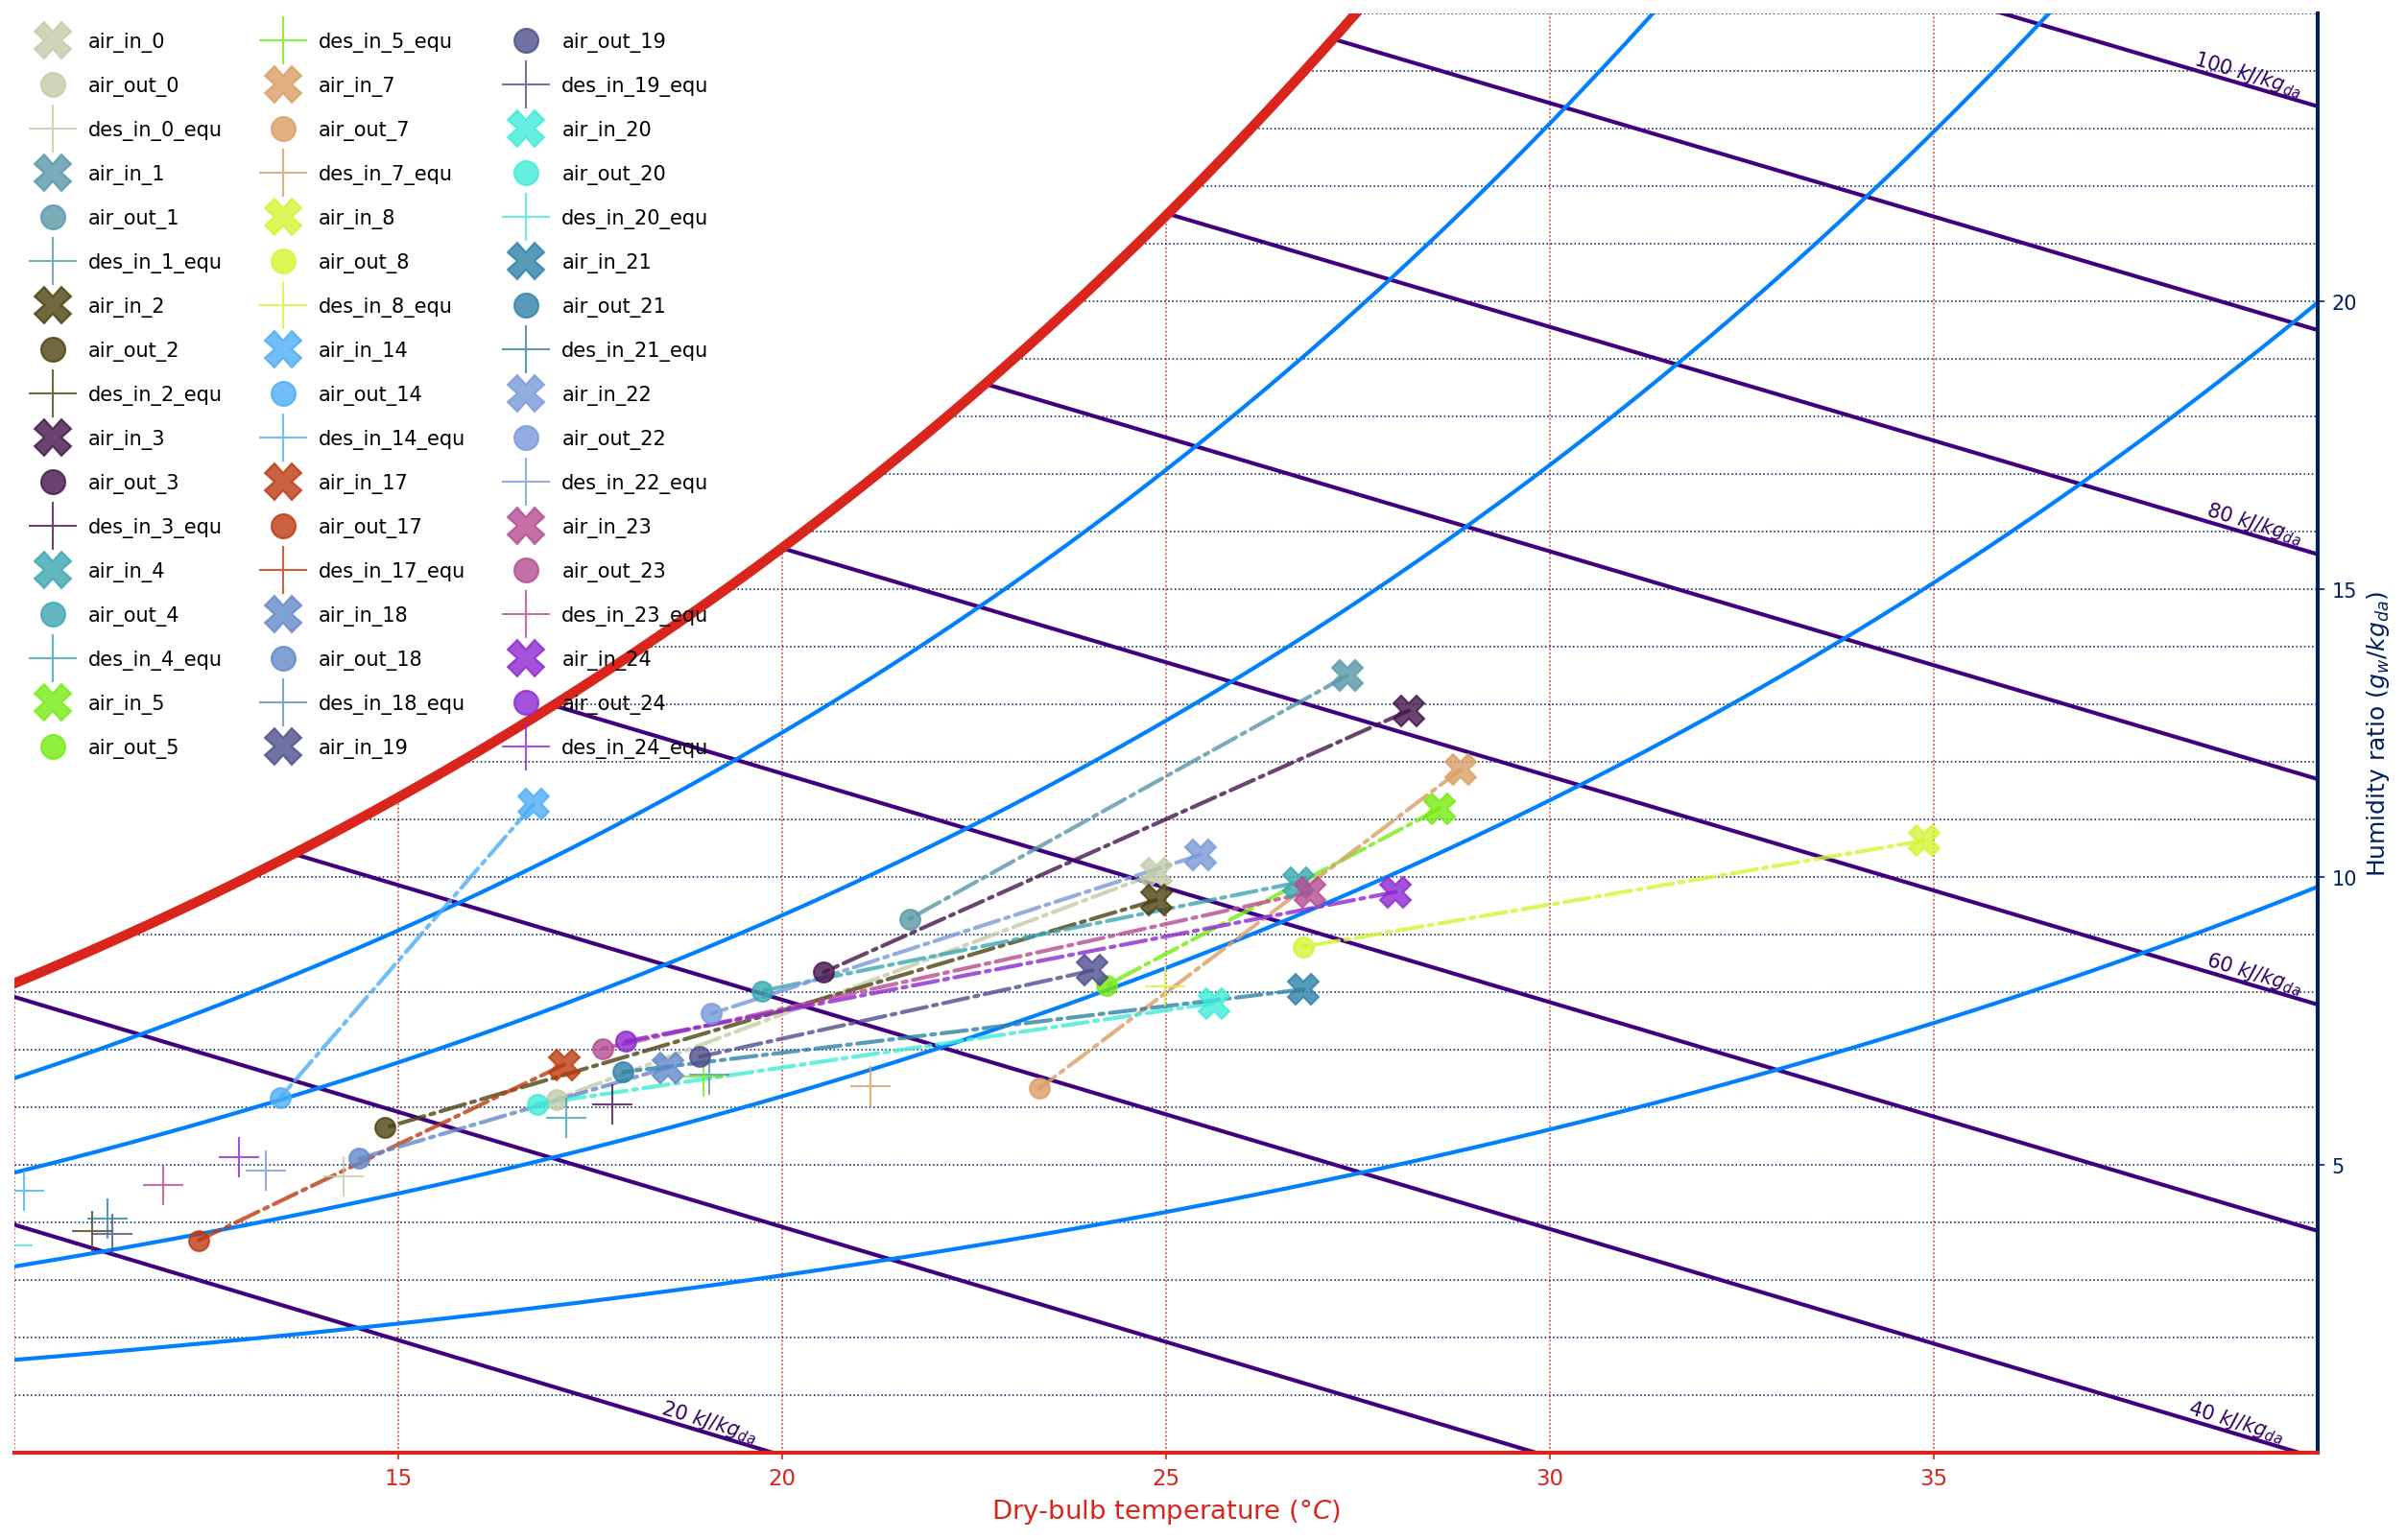

<Figure size 432x288 with 0 Axes>

In [22]:
plot_with_des_point_df(df_data=df_exp_dempav.query('T_a_in - T_a_o_exp > 2'), chart_template="minimal", alpha=0.8, save_fig_name='dempav_cooling.png') # save_fig_name='dempav_cooling.png' 

# Calculate Nu/Sh through calibration
- the main code for this section can be found in calibration_MgCl2_class.py

## Chen2016

## Dempav

In [3]:
def run_calib_MgCl2_dempav(prefix_output, file_name):
    # # run MgCl2
    model_name2 = 'Calibration_MgCl2_dempav'
    print("*****start {}******".format(model_name2))

    bib_path = os.path.join(os.path.expanduser("~"),"GIT",'EnBA_M', "BrineGrid_HDisNet")
    model_path = 'BrineGrid.Fluid.Absorbers.Examples.Validation.'

    df2 = pd.read_excel("../exp_data/actual_data/dempav/{}".format(file_name),index_col = 0) .query('T_a_in - T_a_o_exp > 2')
    print(df2)
    
    # # generate object for calibration class
    MgCl2_obj = Calibration_H_M_transfer(t_stop=3600, exchange_area=6.5, d_e=0.04, cross_area = 0.065, \
        void_fraction = 0.95, delta_T = 0.5, bib_path=bib_path, model_path = model_path, \
            nNodes=8, mNodes=8, model_name=model_name2, prefix_outputfolder=prefix_output)
    
    output_path = MgCl2_obj.get_output_folder()
    print("output path is: {}.".format(output_path))
    
    try:
        #MgCl2_obj.run_calibration(input_dataset=df2.iloc[8,:]) # single simulation
        MgCl2_obj.mp_run(df=df2, num_core=8) #mp.cpu_count()- 4
    except:
        print('Calibration for {} + {} didn\'t completely finished.'.format(model_name2, file_name))

    df_output = MgCl2_obj.read_results(path=output_path)
    df_output.to_csv(path_or_buf=os.path.join(output_path, 'final_output.csv'))

    print('{} (dempav) finished'.format(model_name2))
    return

In [4]:
run_calib_MgCl2_dempav("2021_oct_dempav_2_", "dempav_T_des_corrected.xlsx")

*****start Calibration_MgCl2_dempav******
    T_a_in   RH_a_in    m_a_in  T_d_in   xi_d_in    m_d_in  T_a_o_exp  \
0   298.02  0.480462  0.018848  287.44  0.318302  0.102670     290.21   
1   300.51  0.553303  0.036283  292.20  0.318186  0.102670     294.81   
2   298.02  0.458659  0.032644  284.16  0.318572  0.102670     287.98   
3   301.31  0.504712  0.036150  290.94  0.318174  0.102669     293.69   
4   299.87  0.423994  0.045742  290.34  0.318171  0.102668     292.89   
5   301.71  0.429149  0.050290  292.12  0.318252  0.102675     297.38   
7   301.99  0.447363  0.018140  294.30  0.343938  0.104834     296.50   
8   308.02  0.285443  0.033955  298.14  0.344078  0.104832     299.94   
14  289.91  0.884298  0.044123  283.27  0.276833  0.104691     286.61   
17  290.31  0.519762  0.018728  276.01  0.277934  0.104689     285.55   
18  291.66  0.473850  0.018106  282.41  0.276896  0.104689     287.64   
19  297.19  0.421433  0.043522  284.42  0.323335  0.049907     292.08   
20  298.7

# Get Nu/Sh formula through regression
- the main code for this section can be found in calibration_MgCl2_class.py

- Note: the parameter a-f calculated through regression should be kept as small as possbile (-2 to +2 recommended) to avoid the deviation caused by expoential calculation

## Chen2016

In [31]:
# check results of last step:
bath_path = os.path.join(os.path.expanduser("~"),"GIT","EnBA_M","BrineGrid_HDisNet", "modelica_results")
folder_name = "2021_oct_Calibration_Chen_2016"
file_name = "final_output.csv"

df = pd.read_csv(os.path.join(bath_path, folder_name, file_name), index_col=0)
df

,T_a_in,x_a_in,m_a_in,T_d_in,xi_d_in,m_d_in,T_a_o_exp,x_a_o_exp,T_d_o_exp,xi_d_o_exp,...,T_d_o_sim_new,xi_d_o_sim_new,xi_d_out,x_d_in_equ,Re,Pr,Sc,epsilon_w,epsilon_T,epsilon_h
1,298.75,0.0162,1.85,288.05,0.2300,2.61,292.35,0.0091,294.45,0.2288,...,293.301880,0.228865,0.228848,0.006411,996.698754,0.723822,0.665818,0.725270,0.598131,0.687494
10,297.15,0.0152,1.94,289.95,0.2961,2.82,293.25,0.0075,296.25,0.2945,...,295.042755,0.294639,0.294540,0.005028,1048.989749,0.722987,0.665865,0.757000,0.541667,0.710071
11,297.35,0.0160,1.98,290.85,0.3007,2.85,294.05,0.0077,297.05,0.2990,...,296.498871,0.298972,0.298976,0.005172,1070.471776,0.723793,0.665906,0.766523,0.507692,0.716903
12,298.25,0.0152,1.94,291.25,0.3052,2.90,294.45,0.0075,297.25,0.3036,...,296.439911,0.303645,0.303636,0.005146,1046.027445,0.722846,0.665787,0.765884,0.542857,0.717881
13,298.35,0.0143,1.95,290.95,0.3182,2.85,294.25,0.0069,297.05,0.3166,...,296.253540,0.316602,0.316597,0.004590,1050.698532,0.721900,0.665719,0.762118,0.554054,0.714170
14,299.05,0.0159,1.99,292.35,0.3215,2.86,295.75,0.0077,298.95,0.3196,...,298.045074,0.319695,0.319676,0.004912,1071.149531,0.723472,0.665776,0.746246,0.492537,0.697101
15,298.75,0.0143,1.93,291.55,0.3312,2.88,294.75,0.0066,297.65,0.3295,...,296.987885,0.329501,0.329500,0.004322,1038.855687,0.721849,0.665691,0.771678,0.555556,0.723933
2,301.75,0.0202,1.87,291.35,0.2400,2.63,296.05,0.0116,298.35,0.2385,...,297.330353,0.238568,0.238541,0.007597,1001.761856,0.727614,0.665828,0.682360,0.548077,0.650017
3,300.65,0.0181,1.92,290.85,0.2550,2.65,295.05,0.0099,297.45,0.2535,...,296.837555,0.253523,0.253494,0.006824,1030.361472,0.725560,0.665793,0.727236,0.571429,0.687884
4,303.15,0.0177,1.89,292.05,0.2600,2.66,296.65,0.0097,298.95,0.2585,...,298.072235,0.258555,0.258530,0.007183,1007.699590,0.724833,0.665567,0.760675,0.585586,0.709571


number of cooling datapoint is 15 

following datasets are excluded from regression: 
 set().
no Nu_2 and Sh_2 in dataframe.
###### use unsorted calibration data ######
number of cooling datapoint is 15 

following datasets are excluded from regression: 
 set().
no Nu_2 and Sh_2 in dataframe.
no Nu_2 and Sh_2 in dataframe.
########### data selected for training are: ############ 
     T_a_in  x_a_in  m_a_in  T_d_in  xi_d_in  x_d_in_equ  m_d_in  T_a_o_exp  \
2   301.75  0.0202    1.87  291.35   0.2400    0.007597    2.63     296.05   
1   298.75  0.0162    1.85  288.05   0.2300    0.006411    2.61     292.35   
6   294.85  0.0108    2.04  282.65   0.2513    0.004017    2.93     287.25   
4   303.15  0.0177    1.89  292.05   0.2600    0.007183    2.66     296.65   
5   300.75  0.0164    1.92  290.45   0.2700    0.006120    2.67     294.75   
7   295.85  0.0153    1.97  285.75   0.2600    0.004737    2.76     289.65   
3   300.65  0.0181    1.92  290.85   0.2550    0.006824    2.65     29

.\..\calibration\postprocessing.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_selected['log_Re'] = (df_input_selected['Re']/2300).apply(math.log)
.\..\calibration\postprocessing.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_selected['log_Pr'] = df_input_selected['Pr'].apply(math.log)
.\..\calibration\postprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

number of cooling datapoint is 15 

following datasets are excluded from regression: 
 set().
no Nu_2 and Sh_2 in dataframe.
no Nu_2 and Sh_2 in dataframe.
###### use unsorted calibration data ######
########### data selected for training are: ############ 
     T_a_in  x_a_in  m_a_in  T_d_in  xi_d_in  x_d_in_equ  m_d_in  T_a_o_exp  \
1   298.75  0.0162    1.85  288.05   0.2300    0.006411    2.61     292.35   
10  297.15  0.0152    1.94  289.95   0.2961    0.005028    2.82     293.25   
11  297.35  0.0160    1.98  290.85   0.3007    0.005172    2.85     294.05   
12  298.25  0.0152    1.94  291.25   0.3052    0.005146    2.90     294.45   
13  298.35  0.0143    1.95  290.95   0.3182    0.004590    2.85     294.25   
14  299.05  0.0159    1.99  292.35   0.3215    0.004912    2.86     295.75   
15  298.75  0.0143    1.93  291.55   0.3312    0.004322    2.88     294.75   
2   301.75  0.0202    1.87  291.35   0.2400    0.007597    2.63     296.05   
3   300.65  0.0181    1.92  290.85   0.

.\..\calibration\postprocessing.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_selected['log_Re'] = (df_input_selected['Re']/2300).apply(math.log)
.\..\calibration\postprocessing.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_selected['log_Pr'] = df_input_selected['Pr'].apply(math.log)
.\..\calibration\postprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Finished! output as C:\Users\guang\GIT\EnBA_M\BrineGrid_HDisNet\modelica_results\2021_oct_Calibration_Chen_2016\2021_oct_Calibration_Chen_2016_12_12_scipy_data.xlsx 

R square Nu training: 0.8239100797307203, test: -3.520284873105166. 

R square Sh training: 0.44683020385797567, test: -12.317328502297915. 



,T_a_in,x_a_in,m_a_in,T_d_in,xi_d_in,x_d_in_equ,m_d_in,T_a_o_exp,T_d_o_exp,x_a_o_exp,Re,Pr,Sc,Nu,Sh,Nu_reg,Sh_reg
1,298.75,0.0162,1.85,288.05,0.2300,0.006411,2.61,292.35,294.45,0.0091,996.698754,0.723822,0.665818,3.280069,3.175383,3.299920,3.198983
10,297.15,0.0152,1.94,289.95,0.2961,0.005028,2.82,293.25,296.25,0.0075,1048.989749,0.722987,0.665865,4.676253,3.513264,4.322116,3.412545
11,297.35,0.0160,1.98,290.85,0.3007,0.005172,2.85,294.05,297.05,0.0077,1070.471776,0.723793,0.665906,5.023988,3.700249,4.815230,3.580780
12,298.25,0.0152,1.94,291.25,0.3052,0.005146,2.90,294.45,297.25,0.0075,1046.027445,0.722846,0.665787,4.187706,3.448256,4.215053,3.705769
13,298.35,0.0143,1.95,290.95,0.3182,0.004590,2.85,294.25,297.05,0.0069,1050.698532,0.721900,0.665719,4.235038,3.379568,4.351557,3.352506
14,299.05,0.0159,1.99,292.35,0.3215,0.004912,2.86,295.75,298.95,0.0077,1071.149531,0.723472,0.665776,4.670414,3.218349,4.904715,3.420252
15,298.75,0.0143,1.93,291.55,0.3312,0.004322,2.88,294.75,297.65,0.0066,1038.855687,0.721849,0.665691,4.440637,3.425219,4.174893,3.146912
2,301.75,0.0202,1.87,291.35,0.2400,0.007597,2.63,296.05,298.35,0.0116,1001.761856,0.727614,0.665828,3.215923,2.755334,3.633331,3.143592
3,300.65,0.0181,1.92,290.85,0.2550,0.006824,2.65,295.05,297.45,0.0099,1030.361472,0.725560,0.665793,4.170882,3.286357,4.070166,3.382236
4,303.15,0.0177,1.89,292.05,0.2600,0.007183,2.66,296.65,298.95,0.0097,1007.699590,0.724833,0.665567,3.742402,3.860091,3.622608,3.611685


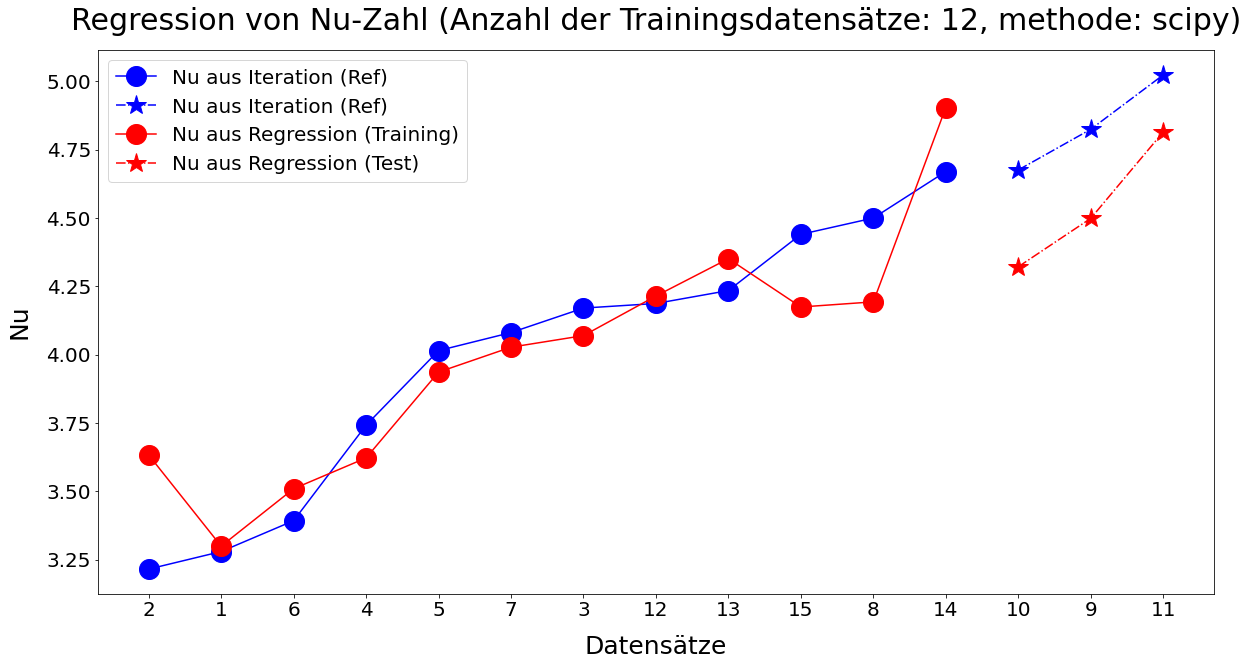

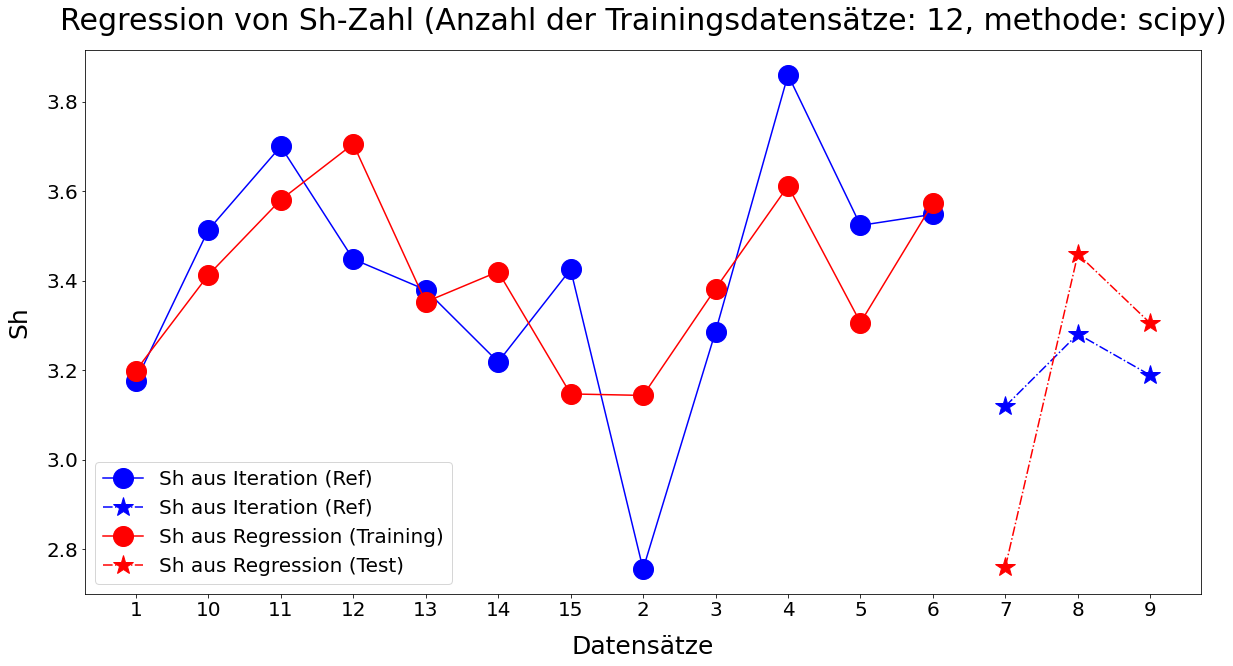

In [20]:
# declare object
obj_postproc = EnBA_M_post_processing(folder_name = "2021_oct_Calibration_Chen_2016", file_name = "final_output.csv")

# run regression
obj_postproc.run_regression_generate_results(method="scipy", Nu_num_training=12, \
                                               Nu_if_sorted=True, Sh_num_training=12, \
                                               Sh_if_sorted=False, physical_Nu_Sh=False, if_plot=True, max_iter=30000)

## Dempav

In [24]:
# check results of last step:
bath_path = os.path.join(os.path.expanduser("~"),"GIT","EnBA_M","BrineGrid_HDisNet", "modelica_results")
folder_name = "2021_oct_dempav_Calibration_MgCl2_dempav"
file_name = "final_output.csv"

df = pd.read_csv(os.path.join(bath_path, folder_name, file_name), index_col=0)
df

,T_a_in,RH_a_in,m_a_in,T_d_in,xi_d_in,m_d_in,T_a_o_exp,RH_a_o_exp,T_d_o_exp,x_a_in,...,T_d_o_sim_new,xi_d_o_sim_new,xi_d_out,x_d_in_equ,Re,Pr,Sc,epsilon_w,epsilon_T,epsilon_h
0,298.02,0.480462,0.018848,287.44,0.318302,0.102670,290.21,0.476947,288.662602,0.009457,...,288.687988,0.318079,0.318087,0.004515,665.090372,0.716941,0.616288,0.745485,0.738185,0.742920
1,300.51,0.553303,0.036283,292.20,0.318186,0.102670,294.81,0.538242,294.359825,0.012683,...,294.646210,0.317649,0.317741,0.006170,1274.153030,0.719955,0.616900,0.609066,0.685921,0.636076
14,289.91,0.884298,0.044123,283.27,0.276833,0.104691,286.61,0.603531,285.632948,0.010582,...,285.351837,0.276326,0.276275,0.004276,1591.385499,0.719162,0.614945,0.758945,0.496988,0.681611
17,290.31,0.519762,0.018728,276.01,0.277934,0.104689,285.55,0.388650,276.796881,0.006337,...,276.794373,0.277791,0.277792,0.002552,673.443779,0.714750,0.614671,0.757589,0.332867,0.502555
18,291.66,0.473850,0.018106,282.41,0.276896,0.104689,287.64,0.468699,282.901939,0.006289,...,282.898682,0.276824,0.276824,0.004029,648.722721,0.714521,0.614921,0.656881,0.434595,0.519292
19,297.19,0.421433,0.043522,284.42,0.323335,0.049907,292.08,0.474445,287.391565,0.007873,...,287.477417,0.322917,0.322939,0.003572,1537.918140,0.715421,0.616040,0.327043,0.400157,0.367827
2,298.02,0.458659,0.032644,284.16,0.318572,0.102670,287.98,0.506137,286.568520,0.009022,...,286.562714,0.318190,0.318196,0.003614,1151.701330,0.716494,0.616260,0.686702,0.724387,0.706884
20,298.77,0.357802,0.044014,283.13,0.317486,0.049666,289.96,0.478044,287.616638,0.007340,...,287.629883,0.317013,0.317024,0.003390,1548.556024,0.714674,0.616280,0.416577,0.563299,0.507790
21,299.94,0.344053,0.050034,284.36,0.311315,0.049425,291.08,0.485803,289.168386,0.007566,...,289.157227,0.310883,0.310890,0.003825,1755.236470,0.714759,0.616496,0.360665,0.568678,0.491942
22,298.60,0.478863,0.037139,286.42,0.303124,0.049105,292.23,0.520544,290.147268,0.009762,...,290.146759,0.302516,0.302531,0.004607,1308.774193,0.717181,0.616406,0.502859,0.522989,0.513834


number of cooling datapoint is 16 

following datasets are excluded from regression: 
 set().
no Nu_2 and Sh_2 in dataframe.
###### use unsorted calibration data ######
number of cooling datapoint is 16 

following datasets are excluded from regression: 
 set().
no Nu_2 and Sh_2 in dataframe.
no Nu_2 and Sh_2 in dataframe.
###### use unsorted calibration data ######
########### data selected for training are: ############ 
     T_a_in    x_a_in    m_a_in  T_d_in   xi_d_in  x_d_in_equ    m_d_in  \
0   298.02  0.009457  0.018848  287.44  0.318302    0.004515  0.102670   
1   300.51  0.012683  0.036283  292.20  0.318186    0.006170  0.102670   
14  289.91  0.010582  0.044123  283.27  0.276833    0.004276  0.104691   
17  290.31  0.006337  0.018728  276.01  0.277934    0.002552  0.104689   
18  291.66  0.006289  0.018106  282.41  0.276896    0.004029  0.104689   
19  297.19  0.007873  0.043522  284.42  0.323335    0.003572  0.049907   
2   298.02  0.009022  0.032644  284.16  0.318572    0.

.\..\calibration\postprocessing.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_selected['log_Re'] = (df_input_selected['Re']/2300).apply(math.log)
.\..\calibration\postprocessing.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_selected['log_Pr'] = df_input_selected['Pr'].apply(math.log)
.\..\calibration\postprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

number of cooling datapoint is 16 

following datasets are excluded from regression: 
 set().
no Nu_2 and Sh_2 in dataframe.
no Nu_2 and Sh_2 in dataframe.
###### use unsorted calibration data ######
########### data selected for training are: ############ 
     T_a_in    x_a_in    m_a_in  T_d_in   xi_d_in  x_d_in_equ    m_d_in  \
0   298.02  0.009457  0.018848  287.44  0.318302    0.004515  0.102670   
1   300.51  0.012683  0.036283  292.20  0.318186    0.006170  0.102670   
14  289.91  0.010582  0.044123  283.27  0.276833    0.004276  0.104691   
17  290.31  0.006337  0.018728  276.01  0.277934    0.002552  0.104689   
18  291.66  0.006289  0.018106  282.41  0.276896    0.004029  0.104689   
19  297.19  0.007873  0.043522  284.42  0.323335    0.003572  0.049907   
2   298.02  0.009022  0.032644  284.16  0.318572    0.003614  0.102670   
20  298.77  0.007340  0.044014  283.13  0.317486    0.003390  0.049666   
21  299.94  0.007566  0.050034  284.36  0.311315    0.003825  0.049425   
2

.\..\calibration\postprocessing.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_selected['log_Re'] = (df_input_selected['Re']/2300).apply(math.log)
.\..\calibration\postprocessing.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_selected['log_Pr'] = df_input_selected['Pr'].apply(math.log)
.\..\calibration\postprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Finished! output as C:\Users\guang\GIT\EnBA_M\BrineGrid_HDisNet\modelica_results\2021_oct_dempav_Calibration_MgCl2_dempav\2021_oct_dempav_Calibration_MgCl2_dempav_12_12_scipy_data.xlsx 

R square Nu training: 0.45379188422832506, test: -0.7901583767346101. 

R square Sh training: 0.6029945171967224, test: -1.544348122103766. 



,T_a_in,x_a_in,m_a_in,T_d_in,xi_d_in,x_d_in_equ,m_d_in,T_a_o_exp,T_d_o_exp,x_a_o_exp,Re,Pr,Sc,Nu,Sh,Nu_reg,Sh_reg
0,298.02,0.009457,0.018848,287.44,0.318302,0.004515,0.102670,290.21,288.662602,0.005773,665.090372,0.716941,0.616288,7.956039,6.980222,7.066878,5.981639
1,300.51,0.012683,0.036283,292.20,0.318186,0.006170,0.102670,294.81,294.359825,0.008716,1274.153030,0.719955,0.616900,16.826762,6.637826,12.458572,10.641470
14,289.91,0.010582,0.044123,283.27,0.276833,0.004276,0.104691,286.61,285.632948,0.005796,1591.385499,0.719162,0.614945,8.326447,19.245612,12.816933,16.091747
17,290.31,0.006337,0.018728,276.01,0.277934,0.002552,0.104689,285.55,276.796881,0.003469,673.443779,0.714750,0.614671,2.058117,6.563798,3.372263,6.533338
18,291.66,0.006289,0.018106,282.41,0.276896,0.004029,0.104689,287.64,282.901939,0.004805,648.722721,0.714521,0.614921,2.786581,4.804433,7.029101,3.622387
19,297.19,0.007873,0.043522,284.42,0.323335,0.003572,0.049907,292.08,287.391565,0.006467,1537.918140,0.715421,0.616040,6.906184,4.461919,12.102024,7.628399
2,298.02,0.009022,0.032644,284.16,0.318572,0.003614,0.102670,287.98,286.568520,0.005308,1151.701330,0.716494,0.616260,13.110604,9.602130,8.594857,11.402376
20,298.77,0.007340,0.044014,283.13,0.317486,0.003390,0.049666,289.96,287.616638,0.005694,1548.556024,0.714674,0.616280,12.030823,6.461659,10.987027,7.335848
21,299.94,0.007566,0.050034,284.36,0.311315,0.003825,0.049425,291.08,289.168386,0.006216,1755.236470,0.714759,0.616496,14.141640,6.314233,12.772553,7.356311
22,298.60,0.009762,0.037139,286.42,0.303124,0.004607,0.049105,292.23,290.147268,0.007170,1308.774193,0.717181,0.616406,9.186743,7.067319,11.637853,6.293242


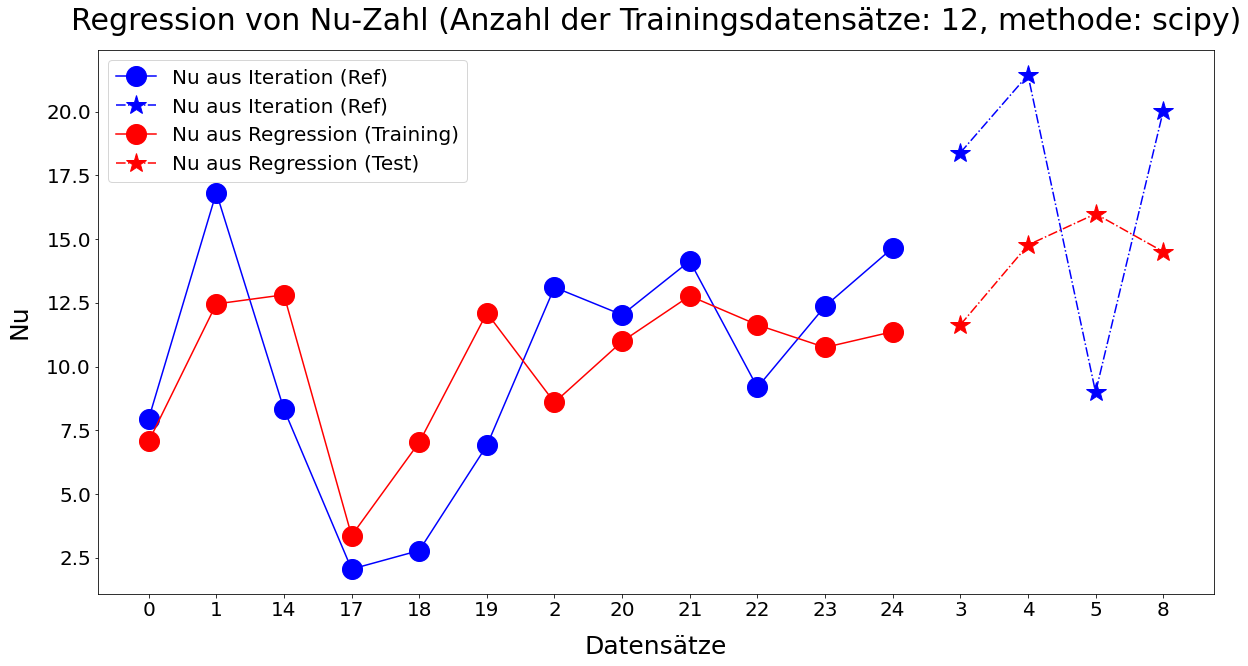

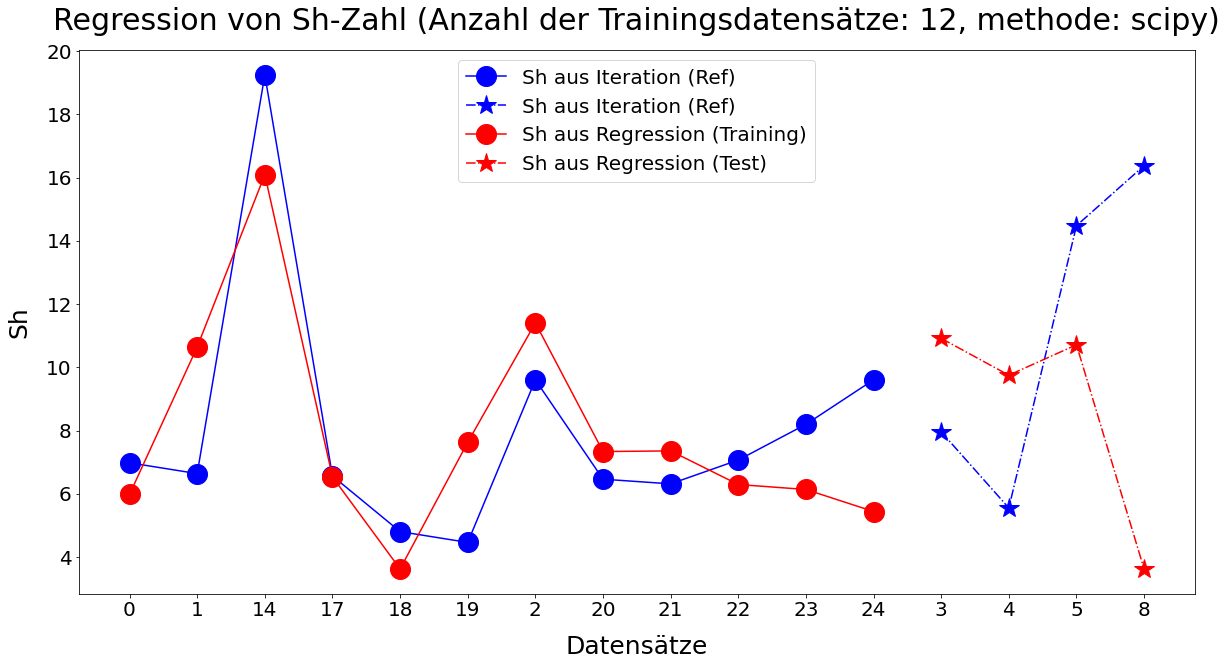

In [26]:
# declare object
obj_postproc = EnBA_M_post_processing(folder_name = "2021_oct_dempav_Calibration_MgCl2_dempav", file_name = "final_output.csv")

# run regression
obj_postproc.run_regression_generate_results(method="scipy", Nu_num_training=12, \
                                               Nu_if_sorted=False, Sh_num_training=12, \
                                               Sh_if_sorted=False, physical_Nu_Sh=False, if_plot=True, max_iter=10000)

# run simulation with new Nu-Sh Formular (calculated by regression)
- Firstly, the formular needs to be passed into modelica manually

In [35]:
def run_Chen_fomular_NuSh(prefix_output, file_name):
    # run simulation using implemented formular for Nu&Sh in Modelica #
    model_name = 'Calibration_Chen_2016'
    print("*****start {}******".format(model_name))

    bib_path = os.path.join(os.path.expanduser("~"),"GIT",'EnBA_M',"BrineGrid_HDisNet")
    model_path = 'BrineGrid.Fluid.Absorbers.Examples.Validation.'

    df2 = pd.read_excel("../exp_data/actual_data/{}".format(file_name),index_col = 0)
    print(df2)

    # # generate object for calibration class
    LiCl2_obj = Calibration_H_M_transfer(t_stop=1800, exchange_area=450*1.5*0.75*0.75, type_desiccant='LiCl',\
        d_e=0.01, cross_area = 1.5*0.75, void_fraction = 0.9, bib_path=bib_path, model_path = model_path, flow_config = 'cross', \
        nNodes=10, mNodes=10, model_name=model_name, prefix_outputfolder=prefix_output, if_Nu_Sh_const=False)

    output_path = LiCl2_obj.get_output_folder()
    
    print("output path is: {}.".format(output_path))
    
    # LiCl2_obj.run_single_simulation(input_dataset=df2.iloc[0,:])
    LiCl2_obj.mp_run(df=df2, mode="simulation", num_core=mp.cpu_count()-2)

    df_output = LiCl2_obj.read_results(path=output_path, mode="simulation")
    df_output.to_csv(path_or_buf=os.path.join(output_path, 'final_output.csv'))

    print('{} finished'.format(model_name))
    return

In [ ]:
# run_Chen_fomular_NuSh(prefix_output='Chen_regress_fomular_Nu_Sh_2021Nov_2_', file_name='Chen2016.xlsx')

# Validate the results

## Chen2016

### read simulation results

In [4]:
bath_path = os.path.join(os.path.expanduser("~"),"GIT","EnBA_M","BrineGrid_HDisNet", "modelica_results")
folder_name = "Chen_regress_fomular_Nu_Sh_2021Nov_2_Calibration_Chen_2016"
file_name = "final_output.csv"

df_sim_results = pd.read_csv(os.path.join(bath_path, folder_name, file_name), index_col=0)
df_sim_results

,T_a_in,x_a_in,m_a_in,T_d_in,xi_d_in,m_d_in,T_a_o_exp,x_a_o_exp,T_d_o_exp,xi_d_o_exp,...,Sh_read,T_a_o_sim_reg,x_a_o_sim_reg,T_d_o_sim_reg,xi_d_o_sim_reg,xi_d_out_cal,x_d_in_equ_cal,Re_cal,Pr_cal,Sc_cal
1,298.75,0.0162,1.85,288.05,0.2300,2.61,292.35,0.0091,294.45,0.2288,...,3.107067,292.406036,0.009351,293.211029,0.228893,0.228848,0.006411,996.698754,0.723822,0.665818
10,297.15,0.0152,1.94,289.95,0.2961,2.82,293.25,0.0075,296.25,0.2945,...,3.217109,293.126221,0.007749,295.136017,0.294601,0.294540,0.005028,1048.989749,0.722987,0.665865
11,297.35,0.0160,1.98,290.85,0.3007,2.85,294.05,0.0077,297.05,0.2990,...,3.311754,293.890411,0.008049,296.269348,0.299061,0.298976,0.005172,1070.471776,0.723793,0.665906
12,298.25,0.0152,1.94,291.25,0.3052,2.90,294.45,0.0075,297.25,0.3036,...,3.407042,294.392334,0.007644,296.371826,0.303676,0.303636,0.005146,1046.027445,0.722846,0.665787
13,298.35,0.0143,1.95,290.95,0.3182,2.85,294.25,0.0069,297.05,0.3166,...,3.169080,294.133514,0.007161,296.117004,0.316664,0.316597,0.004590,1050.698532,0.721900,0.665719
14,299.05,0.0159,1.99,292.35,0.3215,2.86,295.75,0.0077,298.95,0.3196,...,3.194038,295.488403,0.007892,297.982971,0.319733,0.319676,0.004912,1071.149531,0.723472,0.665776
15,298.75,0.0143,1.93,291.55,0.3312,2.88,294.75,0.0066,297.65,0.3295,...,3.050218,294.778748,0.006982,296.740479,0.329596,0.329500,0.004322,1038.855687,0.721849,0.665691
2,301.75,0.0202,1.87,291.35,0.2400,2.63,296.05,0.0116,298.35,0.2385,...,3.024493,295.810638,0.011588,297.458801,0.238546,0.238541,0.007597,1001.761856,0.727614,0.665828
3,300.65,0.0181,1.92,290.85,0.2550,2.65,295.05,0.0099,297.45,0.2535,...,3.160944,294.834930,0.010252,296.716675,0.253565,0.253494,0.006824,1030.361472,0.725560,0.665793
4,303.15,0.0177,1.89,292.05,0.2600,2.66,296.65,0.0097,298.95,0.2585,...,3.291717,296.474609,0.010270,297.811707,0.258639,0.258530,0.007183,1007.699590,0.724833,0.665567


### Model results verification by comparing with expdata and plotting

In [5]:
df_sim_results["delta_T_a_exp"] =  df_sim_results.T_a_in - df_sim_results.T_a_o_exp
df_sim_results["delta_x_a_exp"] =  df_sim_results.x_a_in - df_sim_results.x_a_o_exp

In [6]:
df_sim_results["delta_T_a_sim"] =  df_sim_results.T_a_in - df_sim_results.T_a_o_sim_reg
df_sim_results["delta_x_a_sim"] =  df_sim_results.x_a_in - df_sim_results.x_a_o_sim_reg

In [7]:
df_results_compare = df_sim_results[["delta_T_a_exp", "delta_x_a_exp", "delta_T_a_sim", "delta_x_a_sim"]]

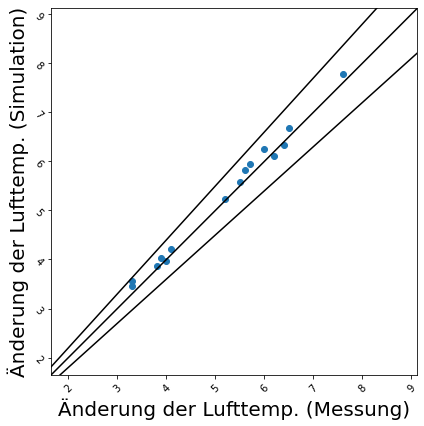

In [16]:
plot_compare_2_cols(df_results_compare.delta_T_a_exp, df_results_compare.delta_T_a_sim, deviation = 0.1, x_label = "Änderung der Lufttemp. (Messung)", y_label = "Änderung der Lufttemp. (Simulation)", save_fig="Chen_T")

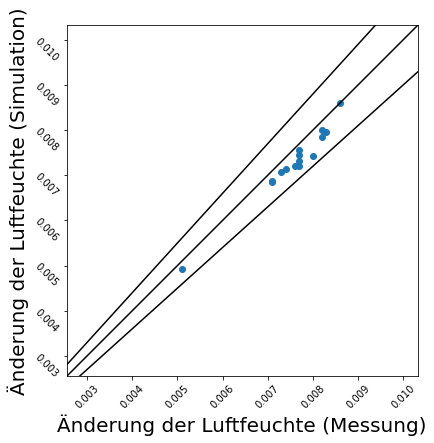

In [17]:
plot_compare_2_cols(df_results_compare.delta_x_a_exp, df_results_compare.delta_x_a_sim, deviation=0.1, x_label = "Änderung der Luftfeuchte (Messung)", y_label = "Änderung der Luftfeuchte (Simulation)", save_fig="Chen_x")

## Dempav

### read sim results

In [41]:
bath_path = os.path.join(os.path.expanduser("~"),"GIT","EnBA_M","BrineGrid_HDisNet", "modelica_results")
folder_name = "Dempav_regress_fomular_Nu_Sh_2021Nov_Validation_MgCl2_dempav"
file_name = "final_output.csv"

df_sim_results = pd.read_csv(os.path.join(bath_path, folder_name, file_name), index_col=0)
df_sim_results

,T_a_in,RH_a_in,m_a_in,T_d_in,xi_d_in,m_d_in,T_a_o_exp,RH_a_o_exp,T_d_o_exp,x_a_in,...,Sh_read,T_a_o_sim_reg,x_a_o_sim_reg,T_d_o_sim_reg,xi_d_o_sim_reg,xi_d_out_cal,x_d_in_equ_cal,Re_cal,Pr_cal,Sc_cal
0,298.02,0.480462,0.018848,287.44,0.318302,0.102670,290.21,0.476947,288.662602,0.009457,...,6.006090,290.295929,0.005961,288.601837,0.318098,0.318087,0.004515,563.505290,0.716941,0.665404
1,300.51,0.553303,0.036283,292.20,0.318186,0.102670,294.81,0.538242,294.359825,0.012683,...,10.621371,295.041473,0.008390,294.389587,0.317703,0.317741,0.006170,1079.540471,0.719955,0.665464
14,289.91,0.884298,0.044123,283.27,0.276833,0.104691,286.61,0.603531,285.632948,0.010582,...,16.314571,286.083557,0.005984,285.567413,0.276299,0.276275,0.004276,1348.319245,0.719162,0.665942
17,290.31,0.519762,0.018728,276.01,0.277934,0.104689,285.55,0.388650,276.796881,0.006337,...,6.642663,283.297546,0.003538,276.915741,0.277795,0.277792,0.002552,570.582809,0.714750,0.665545
18,291.66,0.473850,0.018106,282.41,0.276896,0.104689,287.64,0.468699,282.901939,0.006289,...,3.679307,284.744232,0.005076,283.032074,0.276837,0.276824,0.004029,549.637615,0.714521,0.665482
19,297.19,0.421433,0.043522,284.42,0.323335,0.049907,292.08,0.474445,287.391565,0.007873,...,7.677597,289.969666,0.005898,288.553772,0.322774,0.322939,0.003572,1303.018424,0.715421,0.665337
2,298.02,0.458659,0.032644,284.16,0.318572,0.102670,287.98,0.506137,286.568520,0.009022,...,11.451143,289.700928,0.005068,286.387360,0.318173,0.318196,0.003614,975.791892,0.716494,0.665374
20,298.77,0.357802,0.044014,283.13,0.317486,0.049666,289.96,0.478044,287.616638,0.007340,...,7.371188,290.244019,0.005605,287.534058,0.316993,0.317024,0.003390,1312.031491,0.714674,0.665214
21,299.94,0.344053,0.050034,284.36,0.311315,0.049425,291.08,0.485803,289.168386,0.007566,...,7.379782,291.424438,0.006134,289.046844,0.310856,0.310890,0.003825,1487.143821,0.714759,0.665164
22,298.60,0.478863,0.037139,286.42,0.303124,0.049105,292.23,0.520544,290.147268,0.009762,...,6.312382,291.186798,0.007439,290.184753,0.302585,0.302531,0.004607,1108.873640,0.717181,0.665391


In [42]:
df_sim_results["delta_T_a_exp"] =  df_sim_results.T_a_in - df_sim_results.T_a_o_exp
df_sim_results["delta_x_a_exp"] =  df_sim_results.x_a_in - df_sim_results.x_a_o_exp
df_sim_results["delta_T_a_sim"] =  df_sim_results.T_a_in - df_sim_results.T_a_o_sim_reg
df_sim_results["delta_x_a_sim"] =  df_sim_results.x_a_in - df_sim_results.x_a_o_sim_reg

In [43]:
df_results_compare = df_sim_results[["delta_T_a_exp", "delta_x_a_exp", "delta_T_a_sim", "delta_x_a_sim"]]

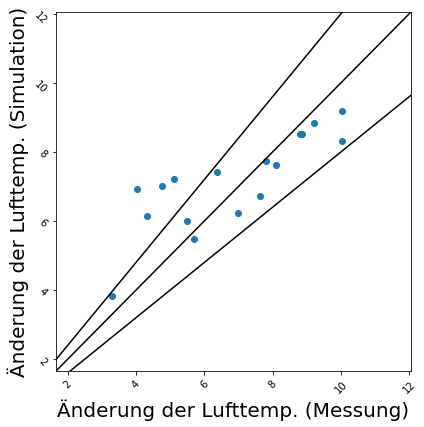

In [48]:
plot_compare_2_cols(df_results_compare.delta_T_a_exp, df_results_compare.delta_T_a_sim, deviation = 0.2, x_label = "Änderung der Lufttemp. (Messung)", y_label = "Änderung der Lufttemp. (Simulation)", save_fig="dempav_T")

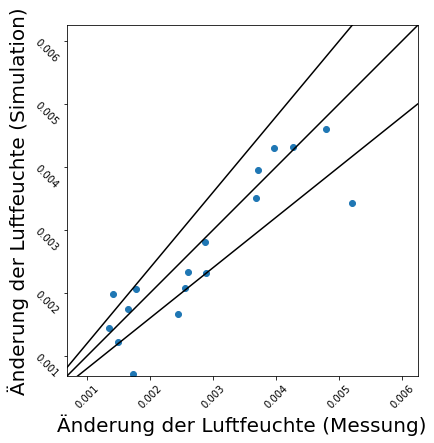

In [47]:
plot_compare_2_cols(df_results_compare.delta_x_a_exp, df_results_compare.delta_x_a_sim, deviation=0.2, x_label = "Änderung der Luftfeuchte (Messung)", y_label = "Änderung der Luftfeuchte (Simulation)", save_fig="dempav_x")